## <center> Лабораторная №3

### Задание:

Решить задачу Коши методом Адамаса и методом эйлера с пересчетом со значениями шага $h_1 = 0.1$ и $h_2 = 0.01$
   
Сравнить результаты графически

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Условие  (вариант 1): 

\begin{cases}
y' = \frac{y^2+xy}{x^2}; \\  y(1) = 1, x \in [1, 2] &&  
\end{cases}

In [2]:
x_0 = 1.
x_1 = 2.
y_0 = 1.
h_1 = .1
h_2 = .01

def f(x,y):
    return (y**2 + x*y) / (x**2)

In [3]:
def Adams(x_0,x,y,x_1,h,recalc = True):
    x_start = x
    y_start = y
    fk = [f(x,y)]
    x_arr = [x]
    y_arr = [y]
    x = x_arr[0]
    y = y_arr[0]
    if x_0 < x:
        for i in range(3):
            if recalc == True:
                y -= 0.5*h*(f(x,y)+f(x+h,y+h*f(x,y)))
            else:
                y += 0.5*h*(f(x,y)+f(x+h,y+h*f(x,y)))
            x -= h
            x_arr += [x]
            y_arr += [y]
            fk += [f(x,y)]
        coef = [55,-59,37,-9]
        fk = fk[::-1]
        #if recalc == False:
         #   coef = -np.array([55,-59,37,-9])
        #else:
         #   coef = np.array([55,-59,37,-9])
            
        while x_0 < x:
            y -= h*np.sum(np.array(coef)*np.array(fk[::-1]))/24
            fk.pop(0)
            fk += [f(x,y)]
            x -= h
            x_arr += [x]
            y_arr += [y]

        x_arr = x_arr[::-1]
        y_arr = y_arr[::-1]
        x = x_start
        y = y_start
        fk = [f(x,y)]
    
    for i in range(3):
        y += 0.5*h*(f(x,y)+f(x+h,y+h*f(x,y)))
        x += h
        x_arr += [x]
        y_arr += [y]
        fk += [f(x,y)]
    coef = [55,-59,37,-9]
    while x_1 > x:
        y += h*np.sum(np.array(coef)*np.array(fk[::-1]))/24
        fk.pop(0)
        fk += [f(x,y)]
        x += h
        x_arr += [x]
        y_arr += [y]
    return {'x': np.array(x_arr), 'y': np.array(y_arr)}

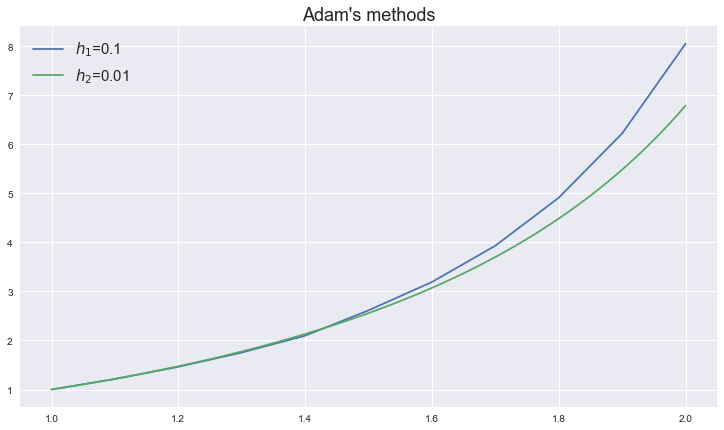

In [4]:
data1 = Adams(x_0,x_0,y_0,x_1,h_1)
data2 = Adams(x_0,x_0,y_0,x_1,h_2)
fig = plt.figure(figsize = (12.5,7))
ax = fig.add_subplot(111)
ax.plot(data1['x'],data1['y'],'-', label = '$h_1$='+str(h_1))
ax.plot(data2['x'],data2['y'],'-', label = '$h_2$='+str(h_2))
plt.legend(fontsize = 15)
plt.title("Adam's methods", size = 18)
plt.show()